In [50]:
import json
import pandas as pd
from fastai.text import *
from fastai.callbacks import *
from fastai.metrics import *

data_lm = load_data("", "data_export.pkl", bs=50)
jdict = {}
with open("dataset.json", "r") as rf:
        while True:
            line = rf.readline()
            if not line:
                break
            raw = json.loads(line)
            jdict[raw["headline"]] = raw["is_sarcastic"]

df = pd.DataFrame(jdict.items(), columns=["headline", "sarcastic"])
df.to_csv("headline_text.csv", sep='\t', encoding="utf-8")

In [51]:
data_classifier = TextClasDataBunch.from_csv("", "headline_text.csv", vocab = data_lm.vocab, 
                                             text_cols="headline", label_cols="sarcastic", delimiter='\t', bs=50)

In [52]:
data_classifier.show_batch()

text,target
"xxbos ' 12 years a slave , ' ' captain phillips , ' ' american hustle , ' ' wolf of wall street , ' ' blue jasmine , ' ' dallas buyers club , ' ' her , ' ' nebraska , ' ' before midnight , ' and ' philomena ' all written during same continuing education screenwriting class",1
"xxbos xxunk leonard , modern prose master , noted for his terse prose style and for writing about things perfectly and succinctly with a remarkable economy of words , unfortunately and sadly expired this gloomy tuesday at the age of 87 years old",1
"xxbos ' how do we treat the little people , joan ? ' i asked . and she said , ' why , we treat them better . we only s -- t on people at our level or higher . '",0
"xxbos ' i 'm afraid you wo n't be coming to our new headquarters , ' declares alexa as amazon execs find themselves locked in seattle office",1
"xxbos ' insane ' as today 's u.s .- russia situation may be , trump and putin do n't matter to fx 's ' the americans '",0


In [ ]:
learn = text_classifier_learner(data_classifier, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('learn1_enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


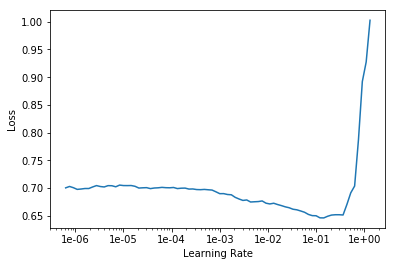

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-2, callbacks=[SaveModelCallback(learn, monitor="accuracy", mode="max")])

epoch,train_loss,valid_loss,accuracy,time
0,0.534557,0.438076,0.797782,04:19


Better model found at epoch 0 with accuracy value: 0.7977823615074158.


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3, callbacks=[SaveModelCallback(learn, monitor="accuracy", mode="max")])
learn.save_encoder("learn0_clas_enc")

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(20, 1e-2, callbacks=[SaveModelCallback(learn, monitor="accuracy", mode="max")])

In [ ]:
learn.save_encoder("learn_clas1_enc")